In [2]:
#@title Import libraries
import cv2
from matplotlib import pyplot
from matplotlib.image import imread
import os
import numpy as np

# Visualizing

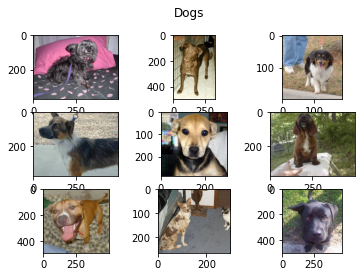

In [12]:
# plot dog photos from the dogs vs cats dataset
# define location of dataset
folder = 'data/Petimages/'
# plot first few images
pyplot.suptitle('Dogs')
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # define filename
    filename = folder + 'Dog/dog.' + str(i) + '.jpg'
    # load image pixels
    image = imread(filename)
    # plot raw pixel data
    pyplot.imshow(image)
# show the figure
pyplot.show()

# credit to https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-to-classify-photos-of-dogs-and-cats/

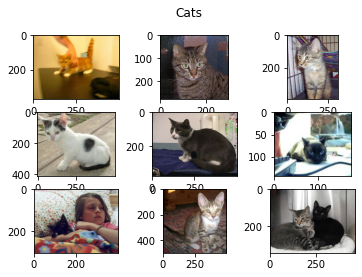

In [11]:
# plot dog photos from the dogs vs cats dataset
# plot first few images
pyplot.suptitle('Cats')
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # define filename
    filename = folder + 'Cat/cat.' + str(i) + '.jpg'
    # load image pixels
    image = imread(filename)
    # plot raw pixel data
    pyplot.imshow(image)
# show the figure
pyplot.show()

# credit to https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-to-classify-photos-of-dogs-and-cats/

we can see that we have uneven picture shape so we should do resizing to images

In [16]:
for i in range(0,12499):
    image = cv2.imread(folder + 'Cat/cat.' + str(i) + '.jpg',0)
    print(image.shape,i)
    cv2.resize(image, (28,28))
    image = cv2.imread(folder + 'Dog/dog.' + str(i) + '.jpg',0)
    print(image.shape,i)
    cv2.resize(image,(28,28))
       


(374, 500) 0
(375, 499) 0
(280, 300) 1
(499, 327) 1
(396, 312) 2
(199, 187) 2
(414, 500) 3
(375, 499) 3
(375, 499) 4
(287, 300) 4
(144, 175) 5
(376, 499) 5
(303, 400) 6
(488, 499) 6
(499, 495) 7
(264, 299) 7
(345, 461) 8
(500, 469) 8
(425, 320) 9
(500, 368) 9
(499, 489) 10
(292, 269) 10
(410, 431) 11
(101, 135) 11
(224, 300) 12
(161, 98) 12
(315, 499) 13
(428, 362) 13
(267, 320) 14
(386, 500) 14
(353, 405) 15
(374, 500) 15
(258, 448) 16
(380, 500) 16
(375, 499) 17
(335, 272) 17
(374, 500) 18
(348, 215) 18
(223, 320) 19
(225, 299) 19
(374, 500) 20
(332, 500) 20
(499, 431) 21
(499, 415) 21
(345, 500) 22
(371, 499) 22
(256, 334) 23
(403, 499) 23
(374, 500) 24
(500, 274) 24
(500, 345) 25
(375, 499) 25
(374, 500) 26
(224, 300) 26
(479, 370) 27
(375, 499) 27
(270, 286) 28
(432, 287) 28
(375, 499) 29
(376, 500) 29
(262, 349) 30
(457, 466) 30
(374, 500) 31
(500, 297) 31
(374, 500) 32
(375, 499) 32
(375, 499) 33
(375, 499) 33
(499, 375) 34
(374, 500) 34
(426, 499) 35
(243, 323) 35
(311, 500) 36

(332, 499) 304
(374, 500) 305
(359, 480) 305
(499, 478) 306
(240, 226) 306
(333, 338) 307
(356, 478) 307
(374, 500) 308
(299, 400) 308
(361, 400) 309
(288, 359) 309
(239, 360) 310
(439, 440) 310
(258, 500) 311
(338, 300) 311
(235, 344) 312
(300, 399) 312
(239, 320) 313
(499, 432) 313
(360, 500) 314
(471, 382) 314
(369, 488) 315
(431, 362) 315
(283, 499) 316
(89, 120) 316
(198, 300) 317
(499, 315) 317
(375, 499) 318
(391, 500) 318
(240, 319) 319
(199, 178) 319
(473, 499) 320
(357, 370) 320
(375, 499) 321
(466, 499) 321
(250, 249) 322
(398, 499) 322
(384, 499) 323
(408, 365) 323
(499, 302) 324
(374, 500) 324
(375, 499) 325
(375, 499) 325
(374, 500) 326
(231, 404) 326
(375, 499) 327
(250, 350) 327
(499, 427) 328
(499, 500) 328
(488, 500) 329
(253, 200) 329
(357, 493) 330
(375, 499) 330
(480, 499) 331
(375, 499) 331
(240, 319) 332
(359, 336) 332
(374, 500) 333
(500, 471) 333
(249, 349) 334
(179, 240) 334
(329, 338) 335
(270, 246) 335
(191, 256) 336
(399, 320) 336
(315, 447) 337
(224, 300) 

(414, 500) 589
(375, 499) 590
(499, 362) 590
(499, 366) 591
(294, 500) 591
(477, 499) 592
(444, 499) 592
(343, 499) 593
(374, 500) 593
(499, 375) 594
(375, 499) 594
(103, 240) 595
(375, 499) 595
(72, 95) 596
(284, 227) 596
(374, 500) 597
(419, 380) 597
(374, 500) 598
(500, 336) 598
(117, 155) 599
(320, 239) 599
(172, 292) 600
(261, 350) 600
(377, 499) 601
(374, 500) 601
(425, 419) 602
(499, 489) 602
(486, 499) 603
(289, 246) 603
(436, 500) 604
(400, 398) 604
(375, 499) 605
(500, 374) 605
(179, 190) 606
(374, 500) 606
(375, 499) 607
(375, 499) 607
(349, 499) 608
(251, 372) 608
(375, 499) 609
(374, 500) 609
(460, 499) 610
(450, 300) 610
(210, 292) 611
(375, 499) 611
(374, 500) 612
(265, 298) 612
(290, 267) 613
(399, 333) 613
(375, 499) 614
(479, 379) 614
(234, 300) 615
(375, 499) 615
(375, 499) 616
(399, 324) 616
(391, 465) 617
(484, 500) 617
(332, 499) 618
(500, 402) 618
(380, 282) 619
(210, 208) 619
(499, 372) 620
(455, 299) 620
(374, 500) 621
(334, 499) 621
(332, 499) 622
(324, 431) 6

(431, 249) 888
(143, 144) 889
(374, 500) 889
(450, 374) 890
(499, 430) 890
(374, 500) 891
(449, 499) 891
(276, 330) 892
(375, 499) 892
(375, 499) 893
(491, 499) 893
(365, 336) 894
(378, 319) 894
(497, 399) 895
(499, 268) 895
(348, 399) 896
(500, 424) 896
(417, 499) 897
(175, 212) 897
(290, 287) 898
(374, 500) 898
(431, 500) 899
(335, 448) 899
(374, 500) 900
(500, 460) 900
(240, 319) 901
(411, 474) 901
(330, 500) 902
(375, 499) 902
(375, 499) 903
(325, 349) 903
(356, 500) 904
(233, 350) 904
(375, 499) 905
(375, 499) 905
(200, 199) 906
(499, 423) 906
(310, 500) 907
(500, 353) 907
(337, 500) 908
(391, 500) 908
(239, 249) 909
(209, 189) 909
(314, 360) 910
(319, 480) 910
(495, 370) 911
(499, 414) 911
(378, 315) 912
(500, 426) 912
(499, 254) 913
(375, 499) 913
(374, 500) 914
(394, 372) 914
(384, 499) 915
(417, 374) 915
(331, 450) 916
(392, 499) 916
(374, 500) 917
(499, 500) 917
(499, 298) 918
(312, 479) 918
(368, 499) 919
(375, 499) 919
(374, 500) 920
(300, 399) 920
(174, 216) 921
(229, 194)

(242, 322) 1190
(499, 328) 1190
(499, 399) 1191
(374, 500) 1191
(367, 499) 1192
(414, 310) 1192
(240, 319) 1193
(289, 500) 1193
(359, 349) 1194
(375, 499) 1194
(376, 500) 1195
(431, 354) 1195
(374, 500) 1196
(328, 500) 1196
(484, 500) 1197
(111, 110) 1197
(374, 500) 1198
(383, 306) 1198
(375, 499) 1199
(206, 200) 1199
(300, 500) 1200
(300, 399) 1200
(375, 499) 1201
(499, 486) 1201
(438, 408) 1202
(499, 449) 1202
(239, 320) 1203
(199, 150) 1203
(374, 500) 1204
(458, 288) 1204
(297, 319) 1205
(499, 356) 1205
(456, 499) 1206
(374, 500) 1206
(374, 500) 1207
(287, 253) 1207
(375, 499) 1208
(375, 499) 1208
(300, 399) 1209
(374, 500) 1209
(375, 499) 1210
(375, 499) 1210
(200, 249) 1211
(375, 499) 1211
(240, 319) 1212
(466, 500) 1212
(499, 265) 1213
(272, 445) 1213
(500, 246) 1214
(374, 500) 1214
(458, 413) 1215
(375, 499) 1215
(500, 323) 1216
(467, 499) 1216
(374, 500) 1217
(354, 347) 1217
(375, 499) 1218
(320, 213) 1218
(450, 399) 1219
(286, 500) 1219
(262, 225) 1220
(469, 367) 1220
(365, 50

(212, 299) 1484
(164, 200) 1484
(374, 500) 1485
(500, 412) 1485
(230, 306) 1486
(287, 280) 1486
(332, 499) 1487
(375, 499) 1487
(404, 306) 1488
(374, 500) 1488
(374, 500) 1489
(410, 499) 1489
(374, 500) 1490
(435, 350) 1490
(335, 437) 1491
(374, 500) 1491
(349, 383) 1492
(188, 252) 1492
(500, 312) 1493
(374, 500) 1493
(375, 499) 1494
(375, 499) 1494
(329, 499) 1495
(375, 499) 1495
(226, 300) 1496
(375, 499) 1496
(351, 469) 1497
(375, 499) 1497
(375, 499) 1498
(239, 320) 1498
(375, 499) 1499
(252, 500) 1499
(500, 490) 1500
(281, 407) 1500
(279, 350) 1501
(375, 499) 1501
(479, 400) 1502
(239, 320) 1502
(374, 500) 1503
(499, 420) 1503
(499, 387) 1504
(360, 394) 1504
(255, 199) 1505
(226, 299) 1505
(375, 499) 1506
(324, 311) 1506
(124, 143) 1507
(258, 149) 1507
(376, 499) 1508
(324, 431) 1508
(334, 377) 1509
(374, 500) 1509
(200, 263) 1510
(287, 231) 1510
(375, 499) 1511
(299, 206) 1511
(495, 500) 1512
(376, 368) 1512
(290, 237) 1513
(200, 199) 1513
(261, 354) 1514
(199, 219) 1514
(407, 50

(181, 157) 1745
(239, 320) 1746
(241, 261) 1746
(499, 375) 1747
(399, 267) 1747
(276, 499) 1748
(298, 422) 1748
(499, 420) 1749
(301, 499) 1749
(317, 390) 1750
(455, 499) 1750
(500, 482) 1751
(200, 118) 1751
(374, 500) 1752
(374, 500) 1752
(161, 243) 1753
(392, 393) 1753
(317, 448) 1754
(199, 152) 1754
(298, 400) 1755
(479, 332) 1755
(499, 333) 1756
(270, 214) 1756
(165, 219) 1757
(396, 500) 1757
(279, 500) 1758
(332, 500) 1758
(374, 500) 1759
(426, 399) 1759
(287, 286) 1760
(373, 500) 1760
(374, 500) 1761
(375, 499) 1761
(198, 304) 1762
(268, 360) 1762
(375, 499) 1763
(500, 305) 1763
(359, 376) 1764
(499, 375) 1764
(375, 499) 1765
(288, 400) 1765
(350, 500) 1766
(500, 490) 1766
(498, 476) 1767
(399, 337) 1767
(375, 499) 1768
(499, 424) 1768
(373, 499) 1769
(500, 450) 1769
(415, 500) 1770
(351, 480) 1770
(190, 189) 1771
(420, 289) 1771
(377, 500) 1772
(375, 499) 1772
(375, 499) 1773
(326, 267) 1773
(500, 388) 1774
(200, 167) 1774
(421, 499) 1775
(249, 250) 1775
(436, 499) 1776
(437, 50

(374, 500) 2049
(278, 300) 2050
(392, 279) 2050
(500, 394) 2051
(375, 499) 2051
(319, 414) 2052
(374, 500) 2052
(374, 500) 2053
(374, 500) 2053
(499, 375) 2054
(499, 375) 2054
(161, 252) 2055
(375, 499) 2055
(374, 500) 2056
(400, 299) 2056
(360, 399) 2057
(239, 180) 2057
(499, 500) 2058
(400, 265) 2058
(299, 200) 2059
(347, 499) 2059
(375, 499) 2060
(500, 383) 2060
(375, 499) 2061
(375, 499) 2061
(375, 499) 2062
(211, 199) 2062
(419, 499) 2063
(374, 500) 2063
(375, 499) 2064
(338, 499) 2064
(263, 349) 2065
(372, 499) 2065
(499, 434) 2066
(446, 499) 2066
(354, 249) 2067
(375, 499) 2067
(252, 235) 2068
(70, 59) 2068
(318, 250) 2069
(500, 365) 2069
(375, 499) 2070
(482, 500) 2070
(464, 500) 2071
(274, 225) 2071
(500, 331) 2072
(399, 271) 2072
(374, 500) 2073
(200, 145) 2073
(500, 422) 2074
(278, 429) 2074
(375, 499) 2075
(499, 361) 2075
(271, 309) 2076
(349, 499) 2076
(315, 499) 2077
(500, 482) 2077
(375, 499) 2078
(468, 499) 2078
(403, 405) 2079
(499, 411) 2079
(500, 470) 2080
(375, 499)

(302, 447) 2316
(374, 500) 2316
(374, 500) 2317
(702, 1050) 2317
(189, 162) 2318
(499, 492) 2318
(225, 276) 2319
(374, 500) 2319
(374, 500) 2320
(374, 500) 2320
(374, 500) 2321
(243, 240) 2321
(239, 320) 2322
(374, 500) 2322
(374, 500) 2323
(499, 418) 2323
(429, 499) 2324
(399, 302) 2324
(286, 401) 2325
(375, 499) 2325
(192, 314) 2326
(375, 499) 2326
(374, 500) 2327
(374, 500) 2327
(500, 422) 2328
(299, 400) 2328
(374, 500) 2329
(399, 324) 2329
(232, 320) 2330
(500, 385) 2330
(239, 320) 2331
(329, 299) 2331
(228, 303) 2332
(239, 320) 2332
(374, 500) 2333
(229, 307) 2333
(374, 500) 2334
(360, 410) 2334
(335, 421) 2335
(270, 267) 2335
(355, 500) 2336
(444, 499) 2336
(375, 499) 2337
(500, 415) 2337
(375, 499) 2338
(158, 178) 2338
(438, 500) 2339
(153, 199) 2339
(359, 478) 2340
(350, 421) 2340
(417, 299) 2341
(375, 500) 2341
(239, 320) 2342
(320, 499) 2342
(316, 499) 2343
(277, 287) 2343
(375, 499) 2344
(344, 394) 2344
(374, 500) 2345
(500, 437) 2345
(374, 500) 2346
(374, 500) 2346
(499, 3

(358, 399) 2599
(483, 271) 2599
(337, 450) 2600
(243, 121) 2600
(239, 320) 2601
(418, 300) 2601
(149, 200) 2602
(436, 461) 2602
(413, 361) 2603
(399, 267) 2603
(370, 499) 2604
(429, 500) 2604
(374, 500) 2605
(191, 229) 2605
(500, 491) 2606
(215, 166) 2606
(499, 375) 2607
(374, 500) 2607
(447, 448) 2608
(500, 374) 2608
(374, 500) 2609
(374, 280) 2609
(500, 374) 2610
(374, 500) 2610
(269, 288) 2611
(374, 500) 2611
(375, 499) 2612
(384, 287) 2612
(338, 500) 2613
(343, 231) 2613
(500, 426) 2614
(218, 162) 2614
(332, 500) 2615
(374, 500) 2615
(374, 500) 2616
(375, 499) 2616
(183, 250) 2617
(331, 450) 2617
(437, 431) 2618
(329, 500) 2618
(445, 500) 2619
(375, 499) 2619
(374, 500) 2620
(343, 499) 2620
(375, 499) 2621
(374, 500) 2621
(316, 311) 2622
(288, 435) 2622
(274, 499) 2623
(374, 500) 2623
(394, 499) 2624
(431, 350) 2624
(499, 377) 2625
(447, 500) 2625
(374, 500) 2626
(335, 499) 2626
(354, 500) 2627
(235, 312) 2627
(400, 330) 2628
(188, 200) 2628
(251, 448) 2629
(428, 350) 2629
(259, 50

(500, 483) 2899
(499, 419) 2899
(500, 481) 2900
(278, 499) 2900
(375, 499) 2901
(150, 149) 2901
(374, 500) 2902
(374, 500) 2902
(374, 500) 2903
(500, 372) 2903
(238, 320) 2904
(499, 407) 2904
(127, 155) 2905
(495, 400) 2905
(199, 150) 2906
(205, 252) 2906
(383, 391) 2907
(404, 500) 2907
(370, 500) 2908
(398, 289) 2908
(359, 288) 2909
(261, 446) 2909
(395, 311) 2910
(171, 249) 2910
(239, 320) 2911
(499, 282) 2911
(375, 499) 2912
(360, 479) 2912
(259, 340) 2913
(221, 180) 2913
(499, 374) 2914
(464, 399) 2914
(336, 447) 2915
(239, 320) 2915
(374, 500) 2916
(400, 355) 2916
(452, 499) 2917
(374, 500) 2917
(470, 400) 2918
(488, 499) 2918
(167, 400) 2919
(388, 500) 2919
(359, 480) 2920
(332, 500) 2920
(240, 319) 2921
(413, 499) 2921
(338, 303) 2922
(491, 493) 2922
(375, 499) 2923
(455, 500) 2923
(375, 499) 2924
(500, 336) 2924
(265, 448) 2925
(404, 464) 2925
(234, 320) 2926
(360, 255) 2926
(381, 499) 2927
(183, 260) 2927
(375, 499) 2928
(500, 332) 2928
(224, 300) 2929
(375, 499) 2929
(261, 35

(245, 227) 3187
(181, 431) 3188
(375, 499) 3188
(454, 499) 3189
(463, 460) 3189
(375, 499) 3190
(499, 496) 3190
(376, 500) 3191
(349, 349) 3191
(360, 479) 3192
(375, 499) 3192
(375, 499) 3193
(499, 346) 3193
(500, 374) 3194
(374, 500) 3194
(440, 499) 3195
(303, 168) 3195
(375, 499) 3196
(428, 496) 3196
(352, 371) 3197
(461, 499) 3197
(419, 499) 3198
(332, 372) 3198
(288, 299) 3199
(326, 499) 3199
(374, 500) 3200
(270, 234) 3200
(279, 499) 3201
(266, 186) 3201
(500, 446) 3202
(375, 499) 3202
(345, 350) 3203
(310, 239) 3203
(157, 210) 3204
(333, 499) 3204
(375, 499) 3205
(374, 500) 3205
(473, 340) 3206
(186, 200) 3206
(470, 499) 3207
(374, 500) 3207
(217, 216) 3208
(299, 350) 3208
(269, 415) 3209
(200, 180) 3209
(299, 400) 3210
(376, 500) 3210
(467, 400) 3211
(499, 496) 3211
(470, 493) 3212
(300, 399) 3212
(275, 412) 3213
(243, 234) 3213
(500, 337) 3214
(333, 499) 3214
(500, 337) 3215
(374, 500) 3215
(110, 154) 3216
(228, 168) 3216
(427, 499) 3217
(389, 360) 3217
(374, 500) 3218
(375, 49

(499, 364) 3449
(404, 500) 3450
(487, 499) 3450
(384, 349) 3451
(500, 440) 3451
(317, 500) 3452
(271, 383) 3452
(393, 479) 3453
(225, 299) 3453
(239, 320) 3454
(429, 499) 3454
(449, 366) 3455
(500, 397) 3455
(499, 332) 3456
(500, 374) 3456
(320, 223) 3457
(374, 500) 3457
(129, 124) 3458
(374, 500) 3458
(360, 479) 3459
(271, 250) 3459
(499, 481) 3460
(333, 379) 3460
(375, 499) 3461
(500, 354) 3461
(354, 499) 3462
(369, 308) 3462
(375, 499) 3463
(375, 499) 3463
(500, 419) 3464
(332, 499) 3464
(465, 480) 3465
(466, 400) 3465
(332, 500) 3466
(461, 499) 3466
(375, 499) 3467
(204, 215) 3467
(133, 178) 3468
(393, 499) 3468
(248, 400) 3469
(475, 500) 3469
(434, 325) 3470
(351, 500) 3470
(500, 357) 3471
(500, 332) 3471
(469, 500) 3472
(300, 226) 3472
(233, 392) 3473
(499, 384) 3473
(442, 499) 3474
(374, 500) 3474
(399, 250) 3475
(374, 500) 3475
(499, 314) 3476
(228, 251) 3476
(500, 400) 3477
(199, 188) 3477
(316, 499) 3478
(422, 300) 3478
(373, 500) 3479
(375, 499) 3479
(375, 499) 3480
(500, 41

(333, 394) 3726
(375, 499) 3727
(499, 375) 3727
(219, 250) 3728
(425, 320) 3728
(375, 499) 3729
(332, 499) 3729
(499, 442) 3730
(302, 399) 3730
(375, 499) 3731
(200, 149) 3731
(375, 499) 3732
(499, 457) 3732
(374, 500) 3733
(348, 500) 3733
(308, 409) 3734
(385, 349) 3734
(289, 359) 3735
(374, 500) 3735
(269, 277) 3736
(307, 389) 3736
(332, 500) 3737
(383, 500) 3737
(297, 347) 3738
(435, 500) 3738
(75, 74) 3739
(166, 217) 3739
(460, 500) 3740
(193, 220) 3740
(320, 281) 3741
(370, 500) 3741
(371, 499) 3742
(500, 399) 3742
(464, 500) 3743
(331, 500) 3743
(348, 479) 3744
(374, 500) 3744
(131, 173) 3745
(499, 348) 3745
(374, 500) 3746
(356, 500) 3746
(375, 499) 3747
(375, 499) 3747
(162, 218) 3748
(375, 499) 3748
(143, 140) 3749
(224, 300) 3749
(299, 400) 3750
(360, 479) 3750
(500, 412) 3751
(439, 350) 3751
(374, 500) 3752
(374, 500) 3752
(147, 130) 3753
(374, 500) 3753
(375, 499) 3754
(500, 434) 3754
(200, 150) 3755
(379, 300) 3755
(375, 499) 3756
(287, 384) 3756
(375, 499) 3757
(500, 415)

(375, 499) 4011
(357, 500) 4011
(267, 199) 4012
(430, 475) 4012
(375, 499) 4013
(240, 232) 4013
(375, 499) 4014
(232, 173) 4014
(374, 500) 4015
(320, 480) 4015
(224, 300) 4016
(362, 400) 4016
(200, 105) 4017
(500, 421) 4017
(374, 276) 4018
(375, 499) 4018
(333, 499) 4019
(374, 500) 4019
(375, 499) 4020
(344, 384) 4020
(311, 399) 4021
(374, 500) 4021
(134, 250) 4022
(499, 388) 4022
(269, 254) 4023
(374, 500) 4023
(375, 499) 4024
(434, 500) 4024
(375, 499) 4025
(374, 500) 4025
(499, 264) 4026
(499, 485) 4026
(333, 500) 4027
(404, 349) 4027
(390, 459) 4028
(279, 171) 4028
(139, 121) 4029
(229, 299) 4029
(438, 499) 4030
(399, 266) 4030
(165, 242) 4031
(479, 372) 4031
(375, 499) 4032
(287, 234) 4032
(376, 500) 4033
(269, 217) 4033
(500, 327) 4034
(220, 136) 4034
(266, 288) 4035
(300, 399) 4035
(499, 439) 4036
(188, 174) 4036
(375, 499) 4037
(499, 489) 4037
(374, 500) 4038
(499, 284) 4038
(410, 234) 4039
(273, 322) 4039
(217, 299) 4040
(251, 300) 4040
(431, 300) 4041
(500, 374) 4041
(375, 49

(189, 307) 4284
(336, 499) 4285
(240, 319) 4285
(385, 377) 4286
(320, 239) 4286
(271, 410) 4287
(374, 500) 4287
(332, 499) 4288
(375, 499) 4288
(374, 500) 4289
(259, 349) 4289
(289, 242) 4290
(375, 499) 4290
(499, 301) 4291
(243, 211) 4291
(382, 336) 4292
(315, 409) 4292
(238, 373) 4293
(420, 403) 4293
(374, 500) 4294
(331, 349) 4294
(384, 499) 4295
(454, 499) 4295
(299, 400) 4296
(499, 313) 4296
(375, 499) 4297
(181, 120) 4297
(373, 500) 4298
(426, 500) 4298
(499, 400) 4299
(499, 375) 4299
(470, 500) 4300
(447, 282) 4300
(359, 480) 4301
(104, 139) 4301
(374, 500) 4302
(265, 400) 4302
(449, 431) 4303
(398, 416) 4303
(374, 500) 4304
(499, 339) 4304
(269, 360) 4305
(471, 499) 4305
(199, 104) 4306
(375, 499) 4306
(468, 500) 4307
(305, 343) 4307
(333, 499) 4308
(267, 356) 4308
(374, 500) 4309
(375, 499) 4309
(374, 500) 4310
(374, 500) 4310
(212, 258) 4311
(470, 291) 4311
(275, 178) 4312
(499, 334) 4312
(499, 333) 4313
(374, 500) 4313
(374, 500) 4314
(374, 500) 4314
(269, 360) 4315
(499, 40

(500, 374) 4557
(225, 232) 4557
(210, 333) 4558
(295, 299) 4558
(371, 500) 4559
(375, 499) 4559
(329, 396) 4560
(369, 262) 4560
(267, 379) 4561
(212, 200) 4561
(336, 447) 4562
(440, 499) 4562
(208, 324) 4563
(320, 500) 4563
(274, 260) 4564
(170, 200) 4564
(500, 319) 4565
(282, 284) 4565
(335, 448) 4566
(399, 278) 4566
(422, 499) 4567
(500, 474) 4567
(398, 499) 4568
(499, 432) 4568
(459, 500) 4569
(283, 499) 4569
(375, 499) 4570
(398, 385) 4570
(374, 500) 4571
(322, 395) 4571
(399, 298) 4572
(425, 418) 4572
(374, 500) 4573
(267, 399) 4573
(374, 500) 4574
(374, 500) 4574
(374, 500) 4575
(375, 499) 4575
(359, 361) 4576
(350, 349) 4576
(106, 59) 4577
(375, 499) 4577
(331, 450) 4578
(374, 500) 4578
(491, 499) 4579
(374, 500) 4579
(298, 350) 4580
(499, 380) 4580
(499, 375) 4581
(499, 481) 4581
(302, 251) 4582
(332, 500) 4582
(332, 500) 4583
(279, 431) 4583
(499, 449) 4584
(375, 499) 4584
(371, 499) 4585
(371, 266) 4585
(500, 461) 4586
(393, 499) 4586
(374, 500) 4587
(375, 390) 4587
(262, 349

(415, 449) 4829
(500, 413) 4829
(257, 196) 4830
(255, 280) 4830
(299, 300) 4831
(494, 500) 4831
(375, 499) 4832
(279, 500) 4832
(95, 84) 4833
(374, 500) 4833
(375, 499) 4834
(374, 500) 4834
(284, 349) 4835
(499, 456) 4835
(356, 300) 4836
(499, 344) 4836
(375, 499) 4837
(120, 180) 4837
(280, 399) 4838
(172, 259) 4838
(149, 200) 4839
(375, 499) 4839
(369, 440) 4840
(249, 200) 4840
(374, 500) 4841
(375, 499) 4841
(115, 141) 4842
(500, 276) 4842
(500, 332) 4843
(194, 260) 4843
(333, 499) 4844
(374, 375) 4844
(297, 499) 4845
(270, 359) 4845
(187, 141) 4846
(374, 500) 4846
(242, 287) 4847
(374, 500) 4847
(332, 500) 4848
(375, 499) 4848
(233, 149) 4849
(355, 500) 4849
(375, 499) 4850
(374, 450) 4850
(455, 500) 4851
(386, 499) 4851
(209, 280) 4852
(500, 416) 4852
(475, 499) 4853
(259, 174) 4853
(374, 500) 4854
(375, 499) 4854
(499, 375) 4855
(239, 320) 4855
(310, 399) 4856
(293, 296) 4856
(375, 499) 4857
(500, 444) 4857
(287, 192) 4858
(500, 332) 4858
(378, 299) 4859
(293, 271) 4859
(374, 500)

(333, 500) 5090
(375, 499) 5090
(499, 388) 5091
(399, 313) 5091
(477, 479) 5092
(500, 288) 5092
(375, 499) 5093
(470, 377) 5093
(375, 499) 5094
(329, 250) 5094
(168, 191) 5095
(378, 499) 5095
(374, 500) 5096
(375, 499) 5096
(400, 337) 5097
(375, 499) 5097
(499, 351) 5098
(252, 240) 5098
(298, 379) 5099
(361, 319) 5099
(374, 500) 5100
(500, 376) 5100
(437, 499) 5101
(469, 452) 5101
(375, 499) 5102
(289, 350) 5102
(290, 381) 5103
(490, 500) 5103
(431, 317) 5104
(289, 383) 5104
(239, 320) 5105
(261, 350) 5105
(375, 499) 5106
(399, 362) 5106
(425, 499) 5107
(399, 273) 5107
(500, 486) 5108
(219, 404) 5108
(499, 306) 5109
(263, 349) 5109
(500, 366) 5110
(333, 500) 5110
(143, 376) 5111
(413, 480) 5111
(375, 499) 5112
(478, 499) 5112
(447, 338) 5113
(499, 335) 5113
(223, 320) 5114
(375, 499) 5114
(298, 345) 5115
(374, 499) 5115
(499, 424) 5116
(331, 500) 5116
(375, 499) 5117
(264, 266) 5117
(374, 500) 5118
(262, 349) 5118
(352, 466) 5119
(375, 499) 5119
(317, 493) 5120
(252, 289) 5120
(318, 34

(427, 499) 5349
(358, 288) 5349
(499, 301) 5350
(240, 136) 5350
(148, 500) 5351
(499, 375) 5351
(477, 429) 5352
(374, 500) 5352
(499, 472) 5353
(390, 500) 5353
(158, 239) 5354
(261, 350) 5354
(375, 499) 5355
(351, 234) 5355
(348, 438) 5356
(357, 293) 5356
(256, 500) 5357
(500, 428) 5357
(373, 500) 5358
(446, 500) 5358
(305, 500) 5359
(225, 299) 5359
(374, 500) 5360
(180, 227) 5360
(261, 350) 5361
(437, 475) 5361
(374, 500) 5362
(193, 219) 5362
(343, 307) 5363
(336, 351) 5363
(348, 405) 5364
(500, 469) 5364
(325, 349) 5365
(178, 233) 5365
(106, 156) 5366
(324, 355) 5366
(374, 500) 5367
(333, 499) 5367
(223, 300) 5368
(374, 500) 5368
(288, 399) 5369
(375, 499) 5369
(248, 300) 5370
(473, 357) 5370
(141, 300) 5371
(474, 386) 5371
(500, 328) 5372
(369, 499) 5372
(375, 499) 5373
(281, 422) 5373
(499, 480) 5374
(499, 438) 5374
(300, 399) 5375
(275, 499) 5375
(345, 309) 5376
(500, 331) 5376
(499, 480) 5377
(189, 140) 5377
(279, 233) 5378
(162, 161) 5378
(423, 499) 5379
(415, 499) 5379
(500, 31

(422, 350) 5606
(149, 200) 5606
(499, 333) 5607
(500, 374) 5607
(374, 500) 5608
(391, 257) 5608
(375, 499) 5609
(449, 450) 5609
(375, 499) 5610
(499, 357) 5610
(356, 500) 5611
(375, 499) 5611
(374, 500) 5612
(336, 447) 5612
(466, 378) 5613
(460, 472) 5613
(421, 490) 5614
(375, 499) 5614
(379, 285) 5615
(375, 499) 5615
(368, 422) 5616
(399, 286) 5616
(239, 145) 5617
(272, 375) 5617
(418, 500) 5618
(89, 60) 5618
(374, 500) 5619
(401, 359) 5619
(399, 500) 5620
(332, 500) 5620
(336, 500) 5621
(499, 402) 5621
(200, 140) 5622
(200, 184) 5622
(374, 500) 5623
(143, 108) 5623
(500, 427) 5624
(393, 450) 5624
(352, 499) 5625
(375, 499) 5625
(375, 499) 5626
(337, 500) 5626
(120, 199) 5627
(336, 339) 5627
(358, 500) 5628
(227, 360) 5628
(262, 349) 5629
(239, 320) 5629
(251, 288) 5630
(374, 500) 5630
(500, 361) 5631
(473, 295) 5631
(499, 412) 5632
(374, 500) 5632
(382, 500) 5633
(136, 158) 5633
(354, 349) 5634
(282, 417) 5634
(499, 394) 5635
(420, 499) 5635
(375, 499) 5636
(377, 499) 5636
(500, 474)

(375, 499) 5877
(336, 430) 5877
(480, 365) 5878
(373, 399) 5878
(375, 499) 5879
(479, 499) 5879
(120, 195) 5880
(499, 217) 5880
(374, 500) 5881
(261, 350) 5881
(193, 223) 5882
(343, 499) 5882
(150, 189) 5883
(305, 340) 5883
(175, 233) 5884
(336, 413) 5884
(275, 350) 5885
(313, 499) 5885
(500, 472) 5886
(162, 161) 5886
(240, 319) 5887
(240, 319) 5887
(207, 289) 5888
(375, 499) 5888
(269, 360) 5889
(324, 500) 5889
(261, 349) 5890
(276, 370) 5890
(375, 499) 5891
(250, 249) 5891
(371, 499) 5892
(334, 499) 5892
(374, 500) 5893
(374, 500) 5893
(374, 500) 5894
(499, 375) 5894
(374, 500) 5895
(240, 319) 5895
(375, 499) 5896
(374, 500) 5896
(357, 499) 5897
(320, 307) 5897
(368, 369) 5898
(374, 500) 5898
(270, 264) 5899
(399, 266) 5899
(334, 499) 5900
(378, 460) 5900
(500, 445) 5901
(447, 336) 5901
(499, 474) 5902
(499, 381) 5902
(312, 450) 5903
(375, 499) 5903
(499, 412) 5904
(283, 424) 5904
(375, 499) 5905
(374, 500) 5905
(500, 333) 5906
(335, 445) 5906
(374, 500) 5907
(500, 499) 5907
(375, 49

(500, 475) 6135
(332, 500) 6136
(273, 199) 6136
(374, 500) 6137
(499, 356) 6137
(333, 386) 6138
(384, 345) 6138
(332, 499) 6139
(349, 250) 6139
(304, 275) 6140
(225, 256) 6140
(500, 370) 6141
(499, 409) 6141
(458, 461) 6142
(434, 500) 6142
(367, 482) 6143
(297, 364) 6143
(444, 390) 6144
(463, 500) 6144
(374, 500) 6145
(407, 500) 6145
(260, 339) 6146
(375, 499) 6146
(391, 399) 6147
(397, 500) 6147
(314, 224) 6148
(240, 319) 6148
(224, 300) 6149
(300, 397) 6149
(352, 500) 6150
(391, 500) 6150
(374, 500) 6151
(155, 187) 6151
(246, 500) 6152
(374, 500) 6152
(301, 335) 6153
(345, 287) 6153
(374, 500) 6154
(500, 332) 6154
(259, 288) 6155
(351, 366) 6155
(486, 500) 6156
(202, 250) 6156
(291, 499) 6157
(375, 499) 6157
(375, 499) 6158
(396, 500) 6158
(461, 466) 6159
(374, 500) 6159
(499, 480) 6160
(500, 317) 6160
(374, 499) 6161
(499, 255) 6161
(375, 499) 6162
(375, 499) 6162
(299, 400) 6163
(319, 317) 6163
(500, 374) 6164
(371, 500) 6164
(374, 500) 6165
(288, 256) 6165
(347, 500) 6166
(270, 35

(499, 473) 6421
(374, 500) 6422
(364, 350) 6422
(199, 299) 6423
(332, 500) 6423
(375, 499) 6424
(364, 500) 6424
(256, 269) 6425
(404, 424) 6425
(374, 500) 6426
(399, 400) 6426
(363, 350) 6427
(342, 315) 6427
(262, 447) 6428
(375, 499) 6428
(225, 288) 6429
(320, 479) 6429
(302, 404) 6430
(318, 423) 6430
(252, 245) 6431
(240, 319) 6431
(499, 472) 6432
(499, 410) 6432
(499, 353) 6433
(375, 499) 6433
(473, 390) 6434
(228, 499) 6434
(198, 300) 6435
(354, 499) 6435
(375, 499) 6436
(374, 500) 6436
(375, 499) 6437
(438, 349) 6437
(479, 360) 6438
(375, 499) 6438
(375, 499) 6439
(403, 400) 6439
(374, 500) 6440
(374, 500) 6440
(500, 421) 6441
(257, 249) 6441
(125, 166) 6442
(499, 405) 6442
(374, 500) 6443
(374, 500) 6443
(375, 499) 6444
(374, 500) 6444
(423, 500) 6445
(375, 499) 6445
(499, 336) 6446
(389, 500) 6446
(250, 349) 6447
(465, 350) 6447
(356, 271) 6448
(368, 499) 6448
(262, 349) 6449
(500, 332) 6449
(333, 499) 6450
(499, 450) 6450
(438, 500) 6451
(374, 500) 6451
(499, 363) 6452
(300, 49

(375, 499) 6689
(374, 500) 6689
(245, 329) 6690
(195, 259) 6690
(331, 311) 6691
(499, 489) 6691
(374, 500) 6692
(500, 304) 6692
(328, 499) 6693
(335, 500) 6693
(447, 260) 6694
(374, 500) 6694
(256, 297) 6695
(374, 500) 6695
(374, 500) 6696
(186, 250) 6696
(373, 500) 6697
(451, 349) 6697
(500, 309) 6698
(400, 500) 6698
(113, 149) 6699
(199, 159) 6699
(454, 500) 6700
(346, 344) 6700
(499, 500) 6701
(303, 405) 6701
(100, 132) 6702
(480, 381) 6702
(131, 198) 6703
(333, 500) 6703
(186, 250) 6704
(322, 278) 6704
(354, 495) 6705
(500, 362) 6705
(367, 499) 6706
(499, 418) 6706
(374, 500) 6707
(327, 244) 6707
(492, 500) 6708
(499, 359) 6708
(375, 499) 6709
(172, 216) 6709
(255, 479) 6710
(499, 333) 6710
(447, 321) 6711
(333, 500) 6711
(223, 192) 6712
(400, 399) 6712
(470, 350) 6713
(374, 500) 6713
(210, 179) 6714
(239, 320) 6714
(499, 395) 6715
(374, 500) 6715
(342, 301) 6716
(329, 499) 6716
(425, 500) 6717
(299, 500) 6717
(227, 300) 6718
(231, 224) 6718
(333, 460) 6719
(399, 500) 6719
(267, 38

(375, 499) 6962
(181, 199) 6962
(374, 500) 6963
(375, 499) 6963
(166, 147) 6964
(218, 269) 6964
(269, 362) 6965
(299, 400) 6965
(254, 447) 6966
(299, 485) 6966
(374, 500) 6967
(375, 499) 6967
(277, 320) 6968
(500, 419) 6968
(225, 299) 6969
(500, 353) 6969
(375, 499) 6970
(456, 345) 6970
(375, 499) 6971
(287, 249) 6971
(375, 499) 6972
(213, 199) 6972
(347, 499) 6973
(476, 374) 6973
(337, 450) 6974
(333, 500) 6974
(191, 256) 6975
(500, 389) 6975
(375, 499) 6976
(448, 499) 6976
(499, 436) 6977
(475, 499) 6977
(174, 200) 6978
(500, 370) 6978
(350, 239) 6979
(500, 448) 6979
(359, 480) 6980
(361, 269) 6980
(499, 277) 6981
(375, 499) 6981
(225, 276) 6982
(399, 438) 6982
(374, 499) 6983
(499, 350) 6983
(227, 480) 6984
(437, 499) 6984
(374, 500) 6985
(121, 143) 6985
(359, 500) 6986
(499, 396) 6986
(375, 499) 6987
(499, 345) 6987
(413, 500) 6988
(186, 250) 6988
(271, 234) 6989
(375, 499) 6989
(222, 221) 6990
(157, 200) 6990
(374, 500) 6991
(499, 305) 6991
(375, 499) 6992
(397, 420) 6992
(375, 49

(375, 499) 7246
(480, 359) 7246
(360, 479) 7247
(348, 299) 7247
(500, 468) 7248
(373, 499) 7248
(297, 269) 7249
(250, 242) 7249
(196, 108) 7250
(375, 499) 7250
(374, 499) 7251
(279, 499) 7251
(201, 252) 7252
(155, 193) 7252
(375, 499) 7253
(273, 299) 7253
(224, 300) 7254
(424, 384) 7254
(457, 399) 7255
(500, 272) 7255
(356, 499) 7256
(375, 499) 7256
(374, 500) 7257
(261, 334) 7257
(374, 500) 7258
(499, 465) 7258
(383, 349) 7259
(374, 500) 7259
(489, 359) 7260
(390, 269) 7260
(374, 500) 7261
(374, 500) 7261
(238, 319) 7262
(374, 500) 7262
(489, 429) 7263
(311, 199) 7263
(266, 400) 7264
(405, 494) 7264
(375, 499) 7265
(375, 499) 7265
(374, 500) 7266
(385, 349) 7266
(300, 500) 7267
(269, 259) 7267
(499, 261) 7268
(373, 500) 7268
(375, 499) 7269
(240, 319) 7269
(180, 265) 7270
(499, 383) 7270
(500, 360) 7271
(499, 363) 7271
(374, 500) 7272
(259, 340) 7272
(375, 499) 7273
(500, 436) 7273
(375, 499) 7274
(500, 499) 7274
(314, 424) 7275
(303, 237) 7275
(225, 295) 7276
(392, 500) 7276
(377, 49

(230, 308) 7536
(375, 499) 7537
(500, 431) 7537
(331, 500) 7538
(374, 500) 7538
(374, 500) 7539
(499, 338) 7539
(424, 499) 7540
(400, 399) 7540
(200, 239) 7541
(405, 349) 7541
(332, 499) 7542
(330, 272) 7542
(224, 300) 7543
(263, 351) 7543
(365, 417) 7544
(142, 167) 7544
(239, 320) 7545
(304, 500) 7545
(375, 499) 7546
(194, 320) 7546
(240, 319) 7547
(475, 500) 7547
(374, 500) 7548
(374, 500) 7548
(215, 184) 7549
(375, 499) 7549
(374, 500) 7550
(499, 488) 7550
(482, 500) 7551
(288, 384) 7551
(499, 333) 7552
(375, 499) 7552
(375, 499) 7553
(262, 349) 7553
(406, 500) 7554
(467, 500) 7554
(298, 448) 7555
(371, 261) 7555
(288, 448) 7556
(432, 423) 7556
(486, 428) 7557
(374, 500) 7557
(126, 166) 7558
(464, 386) 7558
(132, 169) 7559
(322, 300) 7559
(499, 353) 7560
(338, 247) 7560
(343, 500) 7561
(374, 500) 7561
(214, 250) 7562
(397, 500) 7562
(473, 319) 7563
(500, 374) 7563
(207, 329) 7564
(261, 350) 7564
(500, 381) 7565
(415, 499) 7565
(374, 500) 7566
(164, 179) 7566
(499, 373) 7567
(135, 17

(499, 492) 7828
(355, 399) 7829
(241, 235) 7829
(382, 500) 7830
(499, 366) 7830
(359, 355) 7831
(500, 316) 7831
(374, 500) 7832
(332, 500) 7832
(500, 276) 7833
(359, 449) 7833
(256, 240) 7834
(500, 499) 7834
(425, 420) 7835
(323, 400) 7835
(331, 500) 7836
(499, 385) 7836
(363, 418) 7837
(249, 200) 7837
(499, 384) 7838
(288, 429) 7838
(250, 400) 7839
(345, 499) 7839
(187, 147) 7840
(364, 500) 7840
(446, 336) 7841
(375, 499) 7841
(411, 500) 7842
(374, 500) 7842
(286, 326) 7843
(400, 320) 7843
(375, 499) 7844
(375, 499) 7844
(372, 495) 7845
(375, 499) 7845
(499, 500) 7846
(150, 199) 7846
(187, 249) 7847
(299, 187) 7847
(499, 375) 7848
(455, 499) 7848
(375, 499) 7849
(374, 500) 7849
(375, 499) 7850
(365, 500) 7850
(210, 274) 7851
(360, 415) 7851
(375, 499) 7852
(399, 300) 7852
(374, 500) 7853
(245, 152) 7853
(329, 399) 7854
(448, 335) 7854
(500, 241) 7855
(313, 500) 7855
(374, 500) 7856
(479, 399) 7856
(314, 350) 7857
(399, 150) 7857
(375, 499) 7858
(500, 457) 7858
(500, 373) 7859
(375, 49

(500, 395) 8111
(499, 428) 8112
(250, 249) 8112
(341, 258) 8113
(500, 347) 8113
(499, 476) 8114
(350, 500) 8114
(224, 319) 8115
(144, 123) 8115
(275, 499) 8116
(400, 221) 8116
(375, 499) 8117
(350, 500) 8117
(422, 500) 8118
(300, 299) 8118
(399, 500) 8119
(439, 499) 8119
(411, 469) 8120
(375, 499) 8120
(375, 499) 8121
(500, 423) 8121
(119, 159) 8122
(400, 320) 8122
(375, 499) 8123
(458, 500) 8123
(374, 500) 8124
(329, 306) 8124
(450, 417) 8125
(379, 293) 8125
(375, 499) 8126
(224, 320) 8126
(332, 500) 8127
(341, 447) 8127
(395, 340) 8128
(418, 500) 8128
(500, 374) 8129
(263, 349) 8129
(333, 499) 8130
(450, 500) 8130
(374, 500) 8131
(307, 499) 8131
(211, 316) 8132
(374, 500) 8132
(374, 500) 8133
(374, 500) 8133
(374, 500) 8134
(299, 400) 8134
(193, 207) 8135
(500, 318) 8135
(500, 399) 8136
(499, 463) 8136
(374, 500) 8137
(336, 447) 8137
(71, 95) 8138
(499, 426) 8138
(374, 500) 8139
(280, 499) 8139
(256, 300) 8140
(500, 374) 8140
(418, 374) 8141
(375, 499) 8141
(340, 500) 8142
(399, 177)

(279, 202) 8392
(350, 499) 8393
(319, 299) 8393
(398, 500) 8394
(500, 395) 8394
(375, 499) 8395
(260, 339) 8395
(366, 499) 8396
(252, 158) 8396
(375, 499) 8397
(399, 304) 8397
(374, 500) 8398
(489, 431) 8398
(374, 500) 8399
(210, 274) 8399
(374, 500) 8400
(401, 499) 8400
(411, 499) 8401
(478, 435) 8401
(469, 499) 8402
(375, 499) 8402
(444, 329) 8403
(500, 332) 8403
(330, 299) 8404
(375, 499) 8404
(253, 250) 8405
(240, 319) 8405
(392, 500) 8406
(374, 500) 8406
(338, 499) 8407
(499, 357) 8407
(208, 319) 8408
(375, 499) 8408
(374, 500) 8409
(500, 374) 8409
(500, 374) 8410
(383, 500) 8410
(435, 499) 8411
(500, 374) 8411
(275, 205) 8412
(309, 500) 8412
(180, 239) 8413
(499, 500) 8413
(359, 480) 8414
(499, 305) 8414
(209, 300) 8415
(375, 499) 8415
(375, 499) 8416
(500, 415) 8416
(374, 500) 8417
(450, 255) 8417
(286, 175) 8418
(168, 240) 8418
(333, 499) 8419
(321, 460) 8419
(378, 500) 8420
(462, 399) 8420
(499, 399) 8421
(499, 407) 8421
(335, 448) 8422
(447, 500) 8422
(300, 449) 8423
(500, 40

(431, 288) 8664
(158, 209) 8664
(389, 500) 8665
(487, 375) 8665
(499, 332) 8666
(478, 500) 8666
(352, 499) 8667
(316, 467) 8667
(125, 166) 8668
(385, 430) 8668
(374, 500) 8669
(297, 359) 8669
(291, 361) 8670
(479, 418) 8670
(499, 382) 8671
(375, 499) 8671
(375, 499) 8672
(267, 243) 8672
(375, 499) 8673
(499, 438) 8673
(375, 499) 8674
(375, 499) 8674
(377, 499) 8675
(493, 499) 8675
(374, 500) 8676
(249, 220) 8676
(374, 500) 8677
(381, 313) 8677
(350, 239) 8678
(360, 479) 8678
(374, 500) 8679
(375, 499) 8679
(250, 249) 8680
(375, 499) 8680
(375, 499) 8681
(375, 499) 8681
(335, 307) 8682
(500, 324) 8682
(263, 254) 8683
(500, 455) 8683
(351, 320) 8684
(411, 473) 8684
(299, 400) 8685
(200, 199) 8685
(361, 226) 8686
(434, 344) 8686
(400, 499) 8687
(500, 374) 8687
(374, 500) 8688
(300, 399) 8688
(241, 299) 8689
(337, 300) 8689
(300, 349) 8690
(499, 476) 8690
(348, 307) 8691
(375, 499) 8691
(499, 327) 8692
(332, 500) 8692
(500, 236) 8693
(339, 375) 8693
(375, 499) 8694
(361, 499) 8694
(313, 50

(375, 499) 8926
(240, 319) 8926
(186, 250) 8927
(362, 499) 8927
(348, 400) 8928
(499, 375) 8928
(375, 499) 8929
(160, 159) 8929
(254, 399) 8930
(262, 349) 8930
(406, 500) 8931
(374, 500) 8931
(224, 280) 8932
(457, 499) 8932
(317, 479) 8933
(429, 499) 8933
(458, 499) 8934
(500, 483) 8934
(120, 88) 8935
(374, 500) 8935
(374, 500) 8936
(249, 250) 8936
(433, 500) 8937
(499, 346) 8937
(395, 399) 8938
(320, 183) 8938
(375, 499) 8939
(374, 500) 8939
(249, 237) 8940
(131, 149) 8940
(467, 500) 8941
(355, 499) 8941
(113, 140) 8942
(352, 333) 8942
(463, 500) 8943
(499, 393) 8943
(375, 499) 8944
(374, 500) 8944
(240, 319) 8945
(438, 499) 8945
(375, 499) 8946
(310, 250) 8946
(445, 430) 8947
(375, 499) 8947
(375, 499) 8948
(375, 499) 8948
(426, 499) 8949
(269, 358) 8949
(198, 192) 8950
(456, 499) 8950
(240, 239) 8951
(280, 500) 8951
(434, 500) 8952
(449, 336) 8952
(375, 499) 8953
(379, 500) 8953
(263, 319) 8954
(396, 499) 8954
(376, 500) 8955
(499, 436) 8955
(374, 500) 8956
(473, 500) 8956
(225, 299

(327, 300) 9215
(332, 500) 9215
(186, 280) 9216
(258, 418) 9216
(374, 500) 9217
(202, 238) 9217
(374, 433) 9218
(403, 399) 9218
(149, 150) 9219
(209, 238) 9219
(388, 499) 9220
(500, 407) 9220
(500, 499) 9221
(428, 478) 9221
(375, 499) 9222
(500, 414) 9222
(476, 499) 9223
(375, 499) 9223
(375, 499) 9224
(499, 356) 9224
(345, 500) 9225
(374, 500) 9225
(240, 319) 9226
(269, 353) 9226
(261, 350) 9227
(365, 271) 9227
(499, 441) 9228
(500, 267) 9228
(372, 401) 9229
(374, 500) 9229
(339, 500) 9230
(499, 489) 9230
(332, 500) 9231
(499, 380) 9231
(331, 500) 9232
(375, 499) 9232
(266, 354) 9233
(394, 500) 9233
(373, 500) 9234
(276, 320) 9234
(466, 499) 9235
(335, 364) 9235
(375, 499) 9236
(374, 500) 9236
(240, 319) 9237
(385, 279) 9237
(375, 499) 9238
(199, 222) 9238
(500, 426) 9239
(237, 279) 9239
(347, 302) 9240
(397, 473) 9240
(251, 350) 9241
(499, 333) 9241
(332, 499) 9242
(375, 499) 9242
(374, 500) 9243
(399, 300) 9243
(374, 500) 9244
(315, 499) 9244
(400, 499) 9245
(270, 269) 9245
(489, 50

(300, 299) 9482
(374, 500) 9483
(374, 500) 9483
(442, 500) 9484
(500, 326) 9484
(374, 500) 9485
(300, 221) 9485
(331, 500) 9486
(500, 499) 9486
(226, 275) 9487
(116, 145) 9487
(269, 253) 9488
(499, 428) 9488
(410, 499) 9489
(499, 446) 9489
(491, 367) 9490
(318, 499) 9490
(374, 500) 9491
(375, 499) 9491
(334, 297) 9492
(491, 458) 9492
(220, 296) 9493
(298, 399) 9493
(149, 200) 9494
(393, 500) 9494
(291, 325) 9495
(500, 422) 9495
(500, 374) 9496
(189, 192) 9496
(330, 300) 9497
(374, 500) 9497
(335, 448) 9498
(269, 337) 9498
(375, 499) 9499
(500, 383) 9499
(375, 499) 9500
(198, 254) 9500
(499, 314) 9501
(218, 288) 9501
(332, 500) 9502
(500, 333) 9502
(346, 499) 9503
(399, 265) 9503
(216, 349) 9504
(375, 499) 9504
(240, 319) 9505
(379, 499) 9505
(499, 276) 9506
(300, 399) 9506
(245, 300) 9507
(499, 499) 9507
(375, 499) 9508
(476, 500) 9508
(259, 254) 9509
(349, 391) 9509
(196, 350) 9510
(500, 373) 9510
(357, 499) 9511
(240, 239) 9511
(375, 500) 9512
(107, 78) 9512
(374, 500) 9513
(227, 329

(435, 460) 9763
(374, 500) 9764
(373, 500) 9764
(119, 149) 9765
(368, 492) 9765
(375, 499) 9766
(500, 495) 9766
(120, 200) 9767
(375, 499) 9767
(375, 499) 9768
(404, 344) 9768
(425, 354) 9769
(374, 500) 9769
(374, 500) 9770
(384, 500) 9770
(500, 446) 9771
(400, 399) 9771
(375, 499) 9772
(499, 425) 9772
(241, 350) 9773
(216, 285) 9773
(376, 400) 9774
(338, 499) 9774
(375, 499) 9775
(239, 320) 9775
(150, 180) 9776
(294, 355) 9776
(374, 500) 9777
(375, 499) 9777
(341, 408) 9778
(360, 479) 9778
(374, 500) 9779
(375, 499) 9779
(498, 425) 9780
(331, 500) 9780
(375, 499) 9781
(439, 499) 9781
(497, 295) 9782
(384, 330) 9782
(118, 193) 9783
(438, 349) 9783
(401, 479) 9784
(461, 306) 9784
(376, 499) 9785
(477, 496) 9785
(332, 500) 9786
(241, 253) 9786
(374, 500) 9787
(238, 250) 9787
(426, 499) 9788
(378, 384) 9788
(374, 500) 9789
(500, 492) 9789
(374, 500) 9790
(350, 500) 9790
(360, 386) 9791
(374, 500) 9791
(218, 251) 9792
(245, 259) 9792
(333, 499) 9793
(500, 322) 9793
(300, 450) 9794
(500, 33

(374, 500) 10022
(336, 349) 10023
(363, 431) 10023
(431, 325) 10024
(299, 400) 10024
(251, 153) 10025
(375, 499) 10025
(491, 400) 10026
(281, 500) 10026
(332, 500) 10027
(375, 499) 10027
(134, 180) 10028
(374, 500) 10028
(500, 385) 10029
(326, 349) 10029
(462, 500) 10030
(250, 249) 10030
(374, 500) 10031
(374, 500) 10031
(120, 159) 10032
(374, 500) 10032
(374, 500) 10033
(396, 490) 10033
(390, 500) 10034
(284, 500) 10034
(391, 356) 10035
(447, 499) 10035
(263, 300) 10036
(374, 500) 10036
(276, 434) 10037
(500, 394) 10037
(300, 299) 10038
(476, 499) 10038
(500, 360) 10039
(375, 499) 10039
(375, 499) 10040
(499, 319) 10040
(440, 500) 10041
(375, 499) 10041
(480, 319) 10042
(455, 500) 10042
(406, 500) 10043
(239, 320) 10043
(273, 378) 10044
(329, 499) 10044
(374, 500) 10045
(374, 500) 10045
(336, 373) 10046
(333, 499) 10046
(500, 451) 10047
(182, 181) 10047
(384, 385) 10048
(499, 436) 10048
(422, 231) 10049
(500, 406) 10049
(469, 450) 10050
(351, 350) 10050
(450, 432) 10051
(374, 499) 100

(499, 367) 10270
(333, 500) 10271
(330, 329) 10271
(129, 189) 10272
(375, 499) 10272
(325, 351) 10273
(500, 455) 10273
(160, 240) 10274
(88, 132) 10274
(374, 500) 10275
(299, 447) 10275
(374, 500) 10276
(499, 375) 10276
(75, 55) 10277
(261, 350) 10277
(189, 173) 10278
(262, 349) 10278
(387, 404) 10279
(459, 479) 10279
(382, 500) 10280
(232, 240) 10280
(179, 200) 10281
(373, 314) 10281
(375, 499) 10282
(318, 316) 10282
(259, 500) 10283
(481, 500) 10283
(499, 375) 10284
(421, 499) 10284
(186, 250) 10285
(435, 499) 10285
(207, 290) 10286
(294, 247) 10286
(412, 500) 10287
(473, 479) 10287
(500, 499) 10288
(284, 227) 10288
(261, 350) 10289
(280, 420) 10289
(499, 448) 10290
(499, 465) 10290
(499, 428) 10291
(375, 499) 10291
(500, 479) 10292
(302, 144) 10292
(375, 499) 10293
(374, 500) 10293
(279, 328) 10294
(374, 498) 10294
(376, 418) 10295
(287, 352) 10295
(375, 499) 10296
(499, 375) 10296
(348, 371) 10297
(374, 500) 10297
(243, 214) 10298
(312, 500) 10298
(239, 249) 10299
(454, 439) 10299


(463, 485) 10542
(328, 441) 10543
(330, 500) 10543
(476, 482) 10544
(288, 335) 10544
(500, 437) 10545
(278, 269) 10545
(374, 500) 10546
(415, 500) 10546
(369, 499) 10547
(500, 480) 10547
(375, 499) 10548
(362, 499) 10548
(341, 449) 10549
(229, 284) 10549
(353, 328) 10550
(345, 308) 10550
(242, 319) 10551
(374, 500) 10551
(374, 500) 10552
(332, 500) 10552
(375, 499) 10553
(374, 500) 10553
(375, 499) 10554
(500, 318) 10554
(332, 500) 10555
(400, 266) 10555
(375, 499) 10556
(300, 243) 10556
(500, 256) 10557
(375, 499) 10557
(299, 399) 10558
(373, 500) 10558
(374, 500) 10559
(309, 442) 10559
(465, 499) 10560
(260, 207) 10560
(409, 499) 10561
(157, 232) 10561
(374, 500) 10562
(490, 499) 10562
(240, 319) 10563
(374, 500) 10563
(282, 440) 10564
(199, 196) 10564
(374, 500) 10565
(499, 497) 10565
(499, 389) 10566
(343, 500) 10566
(392, 499) 10567
(199, 222) 10567
(334, 499) 10568
(374, 500) 10568
(374, 500) 10569
(375, 499) 10569
(334, 500) 10570
(500, 293) 10570
(334, 499) 10571
(240, 264) 105

(432, 435) 10837
(180, 239) 10838
(401, 383) 10838
(374, 500) 10839
(499, 361) 10839
(499, 355) 10840
(338, 499) 10840
(375, 499) 10841
(374, 500) 10841
(499, 423) 10842
(334, 499) 10842
(375, 499) 10843
(500, 399) 10843
(219, 200) 10844
(374, 500) 10844
(399, 402) 10845
(250, 165) 10845
(374, 500) 10846
(187, 200) 10846
(196, 256) 10847
(199, 267) 10847
(499, 455) 10848
(395, 400) 10848
(477, 340) 10849
(375, 499) 10849
(332, 289) 10850
(361, 500) 10850
(334, 499) 10851
(378, 447) 10851
(500, 412) 10852
(374, 500) 10852
(374, 500) 10853
(308, 345) 10853
(125, 76) 10854
(480, 319) 10854
(353, 317) 10855
(291, 430) 10855
(375, 499) 10856
(376, 500) 10856
(147, 196) 10857
(499, 252) 10857
(499, 375) 10858
(374, 500) 10858
(374, 500) 10859
(315, 500) 10859
(458, 499) 10860
(499, 494) 10860
(369, 500) 10861
(414, 431) 10861
(374, 500) 10862
(499, 500) 10862
(296, 500) 10863
(258, 225) 10863
(377, 377) 10864
(249, 350) 10864
(479, 423) 10865
(500, 442) 10865
(390, 500) 10866
(398, 400) 1086

(500, 370) 11108
(105, 139) 11109
(355, 280) 11109
(333, 499) 11110
(499, 400) 11110
(374, 500) 11111
(199, 200) 11111
(375, 499) 11112
(241, 300) 11112
(186, 179) 11113
(487, 500) 11113
(405, 499) 11114
(240, 319) 11114
(222, 249) 11115
(374, 500) 11115
(374, 500) 11116
(407, 500) 11116
(499, 375) 11117
(375, 499) 11117
(374, 500) 11118
(399, 327) 11118
(332, 500) 11119
(120, 89) 11119
(307, 499) 11120
(312, 264) 11120
(499, 382) 11121
(499, 411) 11121
(499, 329) 11122
(167, 197) 11122
(142, 191) 11123
(399, 339) 11123
(375, 499) 11124
(499, 492) 11124
(372, 493) 11125
(374, 500) 11125
(463, 350) 11126
(250, 237) 11126
(375, 499) 11127
(369, 237) 11127
(500, 425) 11128
(224, 300) 11128
(425, 320) 11129
(374, 500) 11129
(331, 500) 11130
(499, 484) 11130
(375, 499) 11131
(399, 499) 11131
(500, 379) 11132
(499, 461) 11132
(250, 403) 11133
(165, 149) 11133
(475, 445) 11134
(374, 500) 11134
(330, 340) 11135
(299, 400) 11135
(180, 251) 11136
(487, 499) 11136
(271, 447) 11137
(384, 476) 1113

(499, 304) 11384
(429, 500) 11385
(372, 500) 11385
(375, 499) 11386
(403, 495) 11386
(500, 374) 11387
(289, 435) 11387
(500, 469) 11388
(500, 318) 11388
(479, 388) 11389
(428, 319) 11389
(500, 483) 11390
(375, 499) 11390
(315, 284) 11391
(319, 240) 11391
(374, 500) 11392
(423, 477) 11392
(450, 414) 11393
(200, 180) 11393
(250, 360) 11394
(345, 284) 11394
(324, 500) 11395
(420, 341) 11395
(374, 500) 11396
(374, 500) 11396
(299, 394) 11397
(196, 320) 11397
(378, 499) 11398
(260, 400) 11398
(375, 499) 11399
(356, 499) 11399
(388, 301) 11400
(500, 464) 11400
(375, 499) 11401
(374, 500) 11401
(375, 499) 11402
(471, 500) 11402
(438, 500) 11403
(268, 327) 11403
(499, 441) 11404
(206, 313) 11404
(221, 335) 11405
(208, 268) 11405
(449, 430) 11406
(382, 273) 11406
(375, 499) 11407
(400, 291) 11407
(304, 499) 11408
(375, 499) 11408
(374, 500) 11409
(355, 275) 11409
(457, 450) 11410
(350, 315) 11410
(374, 500) 11411
(489, 500) 11411
(290, 195) 11412
(372, 499) 11412
(356, 383) 11413
(490, 400) 114

(374, 500) 11663
(375, 499) 11663
(352, 500) 11664
(499, 351) 11664
(492, 320) 11665
(374, 500) 11665
(406, 499) 11666
(355, 375) 11666
(240, 239) 11667
(477, 499) 11667
(441, 500) 11668
(269, 167) 11668
(375, 499) 11669
(499, 500) 11669
(335, 427) 11670
(499, 375) 11670
(374, 500) 11671
(405, 483) 11671
(386, 499) 11672
(240, 319) 11672
(374, 500) 11673
(499, 360) 11673
(374, 500) 11674
(499, 467) 11674
(189, 249) 11675
(316, 208) 11675
(374, 500) 11676
(423, 500) 11676
(375, 499) 11677
(500, 470) 11677
(375, 499) 11678
(301, 373) 11678
(408, 500) 11679
(362, 349) 11679
(415, 398) 11680
(372, 499) 11680
(432, 500) 11681
(354, 399) 11681
(270, 201) 11682
(263, 200) 11682
(421, 499) 11683
(265, 235) 11683
(375, 499) 11684
(375, 499) 11684
(406, 500) 11685
(500, 498) 11685
(179, 235) 11686
(47, 60) 11686
(278, 350) 11687
(499, 333) 11687
(279, 224) 11688
(175, 252) 11688
(263, 349) 11689
(374, 500) 11689
(500, 473) 11690
(232, 350) 11690
(403, 500) 11691
(370, 431) 11691
(500, 364) 11692

(240, 319) 11933
(316, 212) 11933
(436, 499) 11934
(288, 383) 11934
(202, 219) 11935
(374, 500) 11935
(374, 500) 11936
(499, 499) 11936
(437, 499) 11937
(456, 297) 11937
(323, 432) 11938
(336, 447) 11938
(499, 375) 11939
(478, 339) 11939
(284, 499) 11940
(332, 500) 11940
(375, 499) 11941
(375, 499) 11941
(103, 115) 11942
(374, 500) 11942
(359, 400) 11943
(374, 500) 11943
(374, 500) 11944
(230, 350) 11944
(471, 499) 11945
(479, 224) 11945
(432, 485) 11946
(333, 499) 11946
(239, 320) 11947
(374, 500) 11947
(374, 500) 11948
(299, 243) 11948
(374, 500) 11949
(470, 500) 11949
(375, 499) 11950
(217, 319) 11950
(346, 380) 11951
(375, 499) 11951
(225, 175) 11952
(485, 499) 11952
(499, 378) 11953
(500, 248) 11953
(465, 249) 11954
(375, 499) 11954
(375, 499) 11955
(499, 305) 11955
(331, 228) 11956
(319, 499) 11956
(136, 200) 11957
(199, 200) 11957
(402, 470) 11958
(199, 199) 11958
(374, 500) 11959
(500, 292) 11959
(500, 428) 11960
(375, 499) 11960
(499, 386) 11961
(240, 319) 11961
(375, 499) 119

(375, 499) 12205
(375, 499) 12206
(333, 499) 12206
(375, 499) 12207
(479, 297) 12207
(499, 416) 12208
(266, 400) 12208
(374, 500) 12209
(500, 305) 12209
(279, 360) 12210
(336, 383) 12210
(375, 499) 12211
(405, 350) 12211
(500, 468) 12212
(392, 400) 12212
(404, 288) 12213
(500, 429) 12213
(375, 499) 12214
(262, 349) 12214
(240, 319) 12215
(374, 500) 12215
(269, 239) 12216
(374, 500) 12216
(413, 500) 12217
(428, 499) 12217
(361, 499) 12218
(375, 499) 12218
(408, 307) 12219
(500, 489) 12219
(239, 320) 12220
(374, 500) 12220
(269, 499) 12221
(375, 499) 12221
(240, 319) 12222
(374, 500) 12222
(304, 499) 12223
(100, 108) 12223
(500, 374) 12224
(371, 499) 12224
(499, 375) 12225
(499, 328) 12225
(499, 315) 12226
(339, 460) 12226
(264, 299) 12227
(499, 378) 12227
(255, 339) 12228
(500, 393) 12228
(374, 500) 12229
(479, 499) 12229
(388, 500) 12230
(500, 355) 12230
(499, 467) 12231
(399, 266) 12231
(312, 355) 12232
(373, 500) 12232
(375, 499) 12233
(500, 388) 12233
(376, 499) 12234
(481, 422) 122

(481, 500) 12463
(182, 179) 12464
(332, 500) 12464
(381, 466) 12465
(374, 500) 12465
(269, 360) 12466
(312, 449) 12466
(374, 500) 12467
(315, 400) 12467
(370, 500) 12468
(375, 499) 12468
(375, 499) 12469
(377, 421) 12469
(375, 499) 12470
(249, 200) 12470
(189, 251) 12471
(398, 499) 12471
(239, 191) 12472
(350, 400) 12472
(500, 498) 12473
(331, 500) 12473
(299, 274) 12474
(267, 399) 12474
(374, 500) 12475
(239, 221) 12475
(374, 500) 12476
(433, 215) 12476
(407, 431) 12477
(260, 173) 12477
(375, 499) 12478
(374, 500) 12478
(216, 309) 12479
(240, 319) 12479
(499, 375) 12480
(374, 500) 12480
(374, 500) 12481
(499, 333) 12481
(239, 180) 12482
(374, 500) 12482
(374, 500) 12483
(499, 425) 12483
(500, 497) 12484
(489, 499) 12484
(499, 379) 12485
(374, 500) 12485
(236, 289) 12486
(313, 500) 12486
(374, 499) 12487
(342, 280) 12487
(487, 419) 12488
(456, 500) 12488
(375, 499) 12489
(404, 499) 12489
(308, 353) 12490
(373, 500) 12490
(500, 312) 12491
(375, 499) 12491
(471, 479) 12492
(359, 239) 124

In [ ]:
#cats_images = [img for img in os.listdir(folder + 'Cat/') if img.endswith(".jpg")]
#dogs_images = [img for img in os.listdir(folder + 'Dog/') if img.endswith(".jpg")]
#for img_path in cats_images:
    #image = cv2.imread(folder + 'Cat/' + img_path)
    #cv2.resize(image, dsize = (28,28))


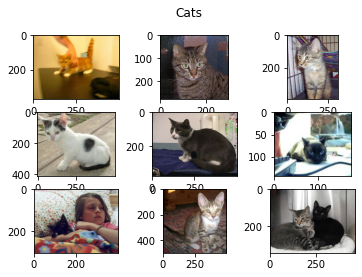

In [17]:
pyplot.suptitle('Cats')
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # define filename
    filename = folder + 'Cat/cat.' + str(i) + '.jpg'
    # load image pixels
    image = imread(filename)
    # plot raw pixel data
    pyplot.imshow(image)
# show the figure
pyplot.show()